# Data Science Master's Degree, 
# Statistical Data Analysis Course


### `Luisa Di Landa`

The following analysis is focused on the Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $\$$50,000 a year based on factors such as education, age, number of hours of work per week, etc.
The classes are imbalanced, having approximately 75\% of the observations earning $\leq 50K \$$ a year and 25\% earning $ >50K \$$.
The dataset has already been divided into train and test set (through a stratified train test split) and both can be found [here](http://archive.ics.uci.edu/ml/datasets/Adult). 

### Import the necessary libraries

In [2]:
import os, seaborn as sns, pandas as pd, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load the data

We load the data keeping in mind that the question marks in the features' values represent missing data. We can then have a look at all the features.

In [4]:
#load the training dataset
missing_val = ' ?'
filepath = 'adult-training.csv'
data = pd.read_csv(filepath, sep=',', header=None, names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race", "sex","capital-gain", "capital-loss", "hours-per-week", "native-country", "target"],na_values = missing_val)

In [5]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Our training dataset has 15 features and 32561 observations. We have 5 numerical features, 1 ordinal feature, and 9 categorical ones.

Let's see something more about them.

In [6]:
header=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race", "sex","capital-gain", "capital-loss", "hours-per-week", "native-country", "target"]

The **categorical features** are:

* `workclass` (could be: private, Self-emp-not-inc, Local-gov, State-gov, Self-emp-inc, Federal-gov, Without-pay);
* `marital-status` (Married-civ-spouse, Never-married, Divorced, Separated, Widowed, Married-spouse-absent, Married-AF-spouse);
* `occupation` (Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical, Sales, Other-service, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-Fishing, Tech-support, Protective-serv, Priv-house-serv, Armed-Forces);
* `relationship` (Husband, Wife, Not-in-family, Own-child, Unmarried, Other-relative);
* `race` (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other);
* `sex` (Male, Female);
* `native-country` (United-States, Mexico, Philippines, Germany, Puerto-Rico, Canada, India, El-Salvador, Cuba, England, Jamaica, South, China, Italy, Dominican-Republic, Vietnam, Guatemala, Japan, Poland, Columbia, Taiwan, Haiti, Iran, Portugal, Nicaragua, Peru, Greece, France, Ecuador, Ireland, Hong, Cambodia, Trinadad&Tobago, Laos, Thailand, Yugoslavia, Outlying-US(Guam-USVI-etc), Hungary, Honduras, Scotland, Holand-Netherlands);
* `target` (<=50K, >50K).

The variable `education` is ordinal.



In [7]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

The **numerical features** are:
* `age`;
* `fnlwgt`;
* `capital-gain`;
* `capital-loss`;
* `hours-per-week`.

While `age` and `hours-per-week` are pretty much self-explanatory, `fnlwgt` is a bit mysterious and deserves a special mention: it is the number of people the census believes the entry represents. `capital-gain` and `capital-loss` represent the income and loss from investments sources.



In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

## Check for missing data

We now check if our dataset has some missing values in it, and where. We'll then have to decide whether to drop those rows or impute the data. 
To do this, we'll use one of pandas dataframe methods, 'isnull', that basically detects missing values. 

In [9]:
%pylab inline

data.isnull().any(axis=0)

Populating the interactive namespace from numpy and matplotlib


age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
target            False
dtype: bool

so we know that `workclass`, `occupation` and `native-country` have some missing value in it. Specifically, how many?

In [10]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

We now check for the distribution of missing values vs the target feature.

In [11]:
check=data.loc[data['workclass'].isnull()==True,['workclass','occupation','native.country','target']]
check['target'].value_counts()

 <=50K    1645
 >50K      191
Name: target, dtype: int64

In [12]:
data['target'].value_counts()

 <=50K    24720
 >50K      7841
Name: target, dtype: int64

In [2]:
1645/24720,191/7841, 191/(191+1645)
#should we remove the missing values? maybe it would be better not to, so as not to lose other info from the minority class?

(0.06654530744336569, 0.024359137865068232, 0.10403050108932461)

We decide to drop the rows with missing values in it.

In [14]:
data.dropna(inplace = True)

In [15]:
data.shape

(30162, 15)

In [16]:
data_copy=data.copy()

## Data Exploration of numerical features

Let's see how our numerical data is distributed through the use of some histograms.

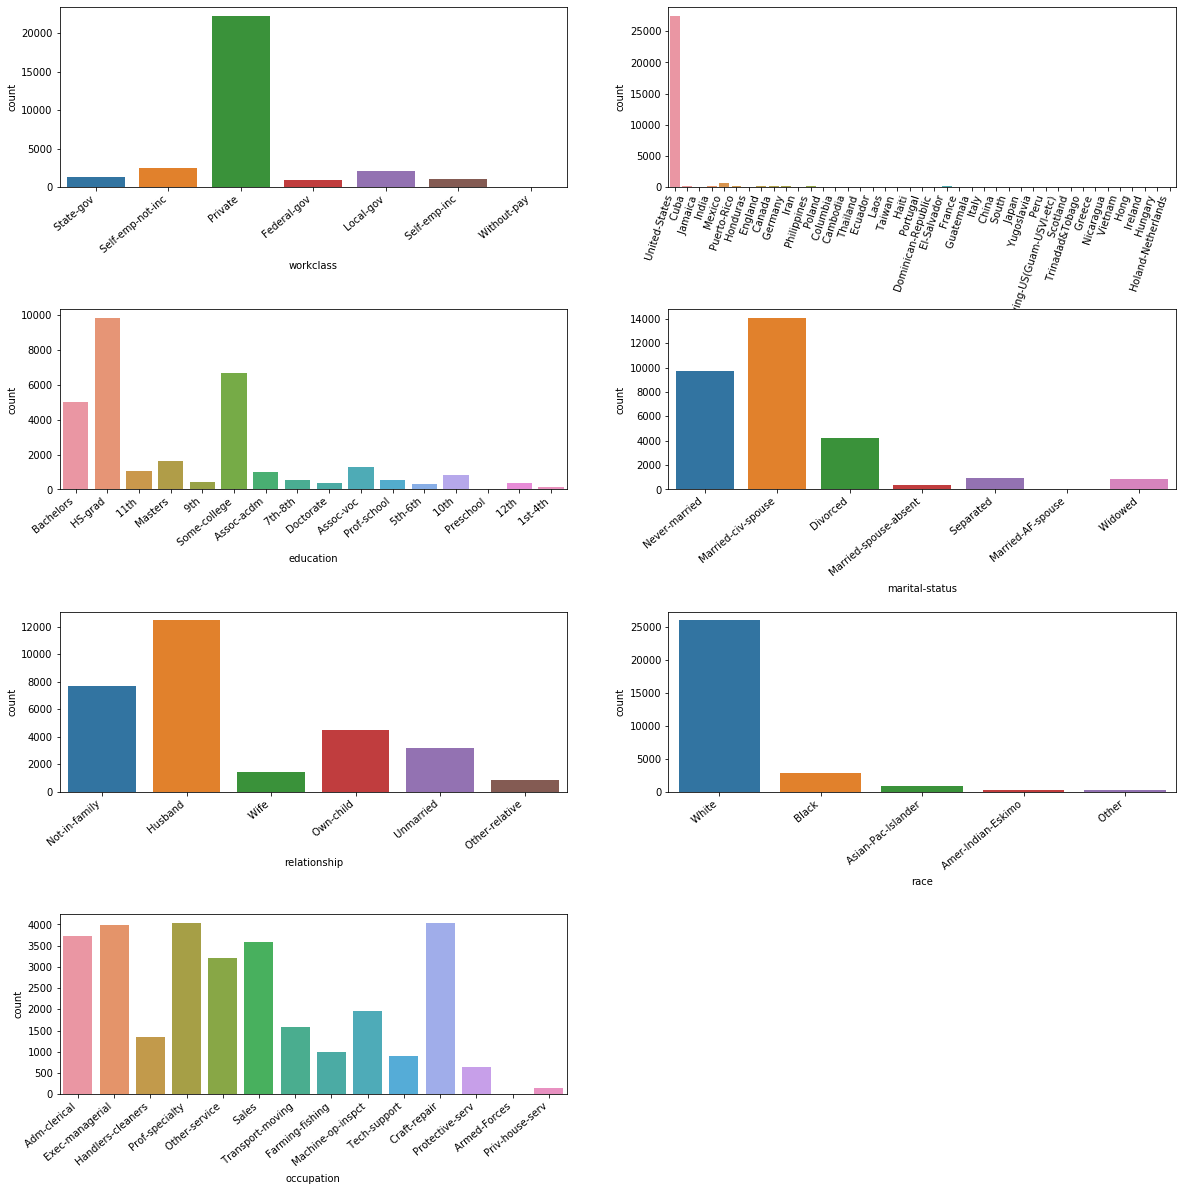

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(data['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(data['native-country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
#order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
#       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(data['education'], ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(data['marital-status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(data['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(data['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(data['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()


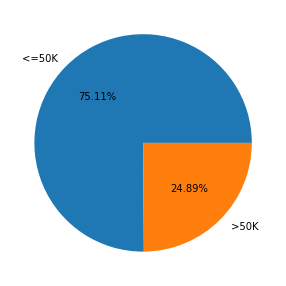

In [18]:

plt.figure(figsize=(10,5))
plt.pie(data_copy['target'].value_counts(),autopct='%.2f%%', shadow=False,labels=data_copy['target'].unique())
plt.show()


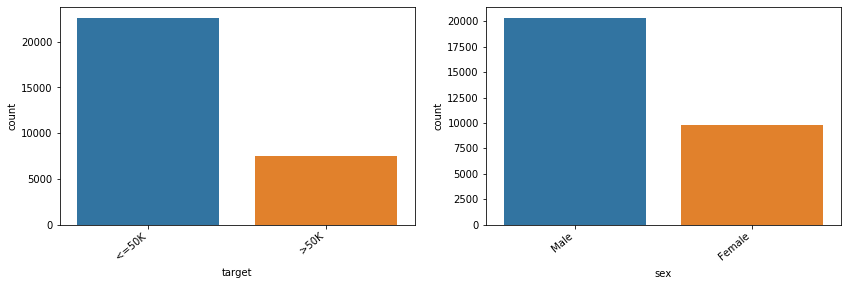

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))
plt.subplots_adjust(hspace=0.68)
#fig.delaxes(axs[3][1])


# Target
t = sns.countplot(data['target'], ax=axs[0])
t.set_xticklabels(t.get_xticklabels(), rotation=40, ha="right")


sex=sns.countplot(data['sex'],  ax=axs[1])
sex.set_xticklabels(sex.get_xticklabels(), rotation=40, ha="right")

plt.show()

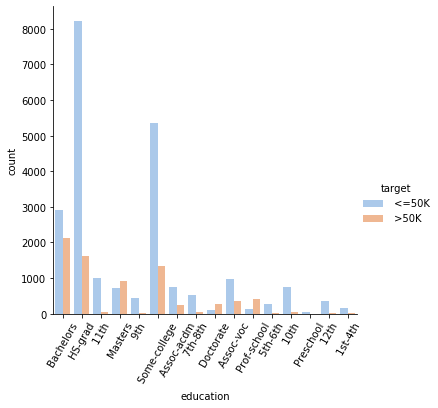

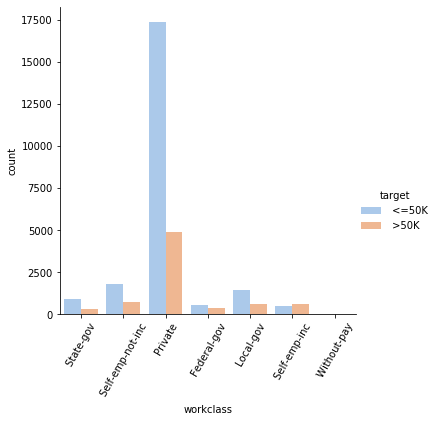

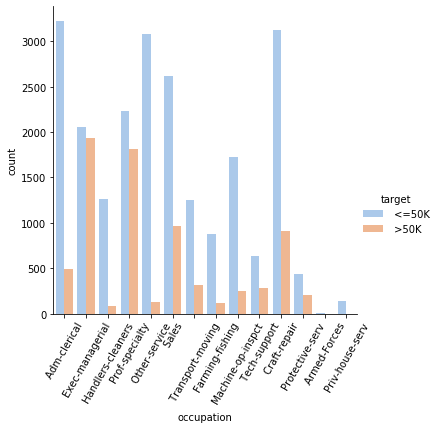

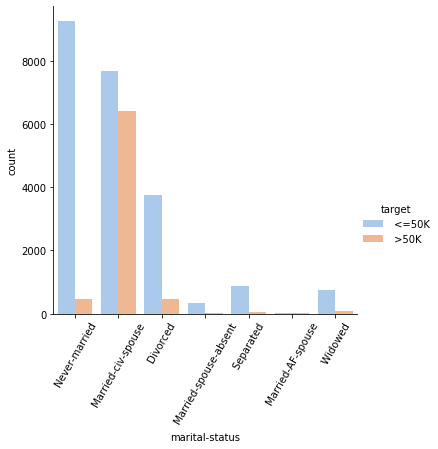

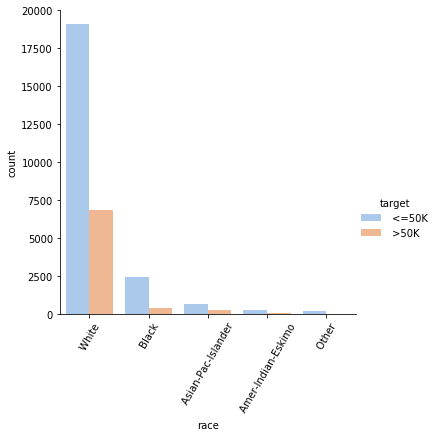

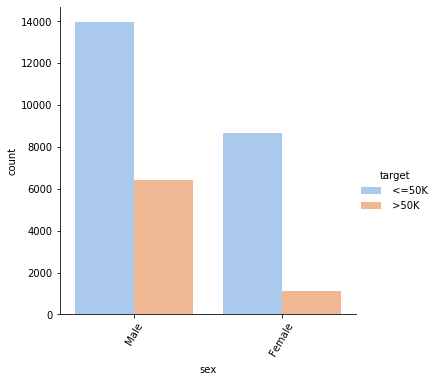

In [20]:
p1=sns.catplot(x="education", kind="count", palette="pastel", data=data_copy,hue='target')
p1.set_xticklabels(rotation=60)

p2=sns.catplot(x="workclass", kind="count", palette="pastel", data=data_copy,hue='target')
p2.set_xticklabels(rotation=60)

p3=sns.catplot(x="occupation", kind="count", palette="pastel", data=data_copy,hue='target')
p3.set_xticklabels(rotation=60)

p4=sns.catplot(x="marital-status", kind="count", palette="pastel", data=data_copy,hue='target')
p4.set_xticklabels(rotation=60)

p5=sns.catplot(x="race", kind="count", palette="pastel", data=data_copy,hue='target')
p5.set_xticklabels(rotation=60)

p6=sns.catplot(x="sex", kind="count", palette="pastel", data=data_copy,hue='target')
p6.set_xticklabels(rotation=60)



In [21]:
data['target'].value_counts()

 <=50K    22654
 >50K      7508
Name: target, dtype: int64

In [22]:
data['target'].value_counts(normalize=True)

 <=50K    0.751078
 >50K     0.248922
Name: target, dtype: float64

In [23]:
data['sex'].value_counts(normalize=True)

 Male      0.675685
 Female    0.324315
Name: sex, dtype: float64

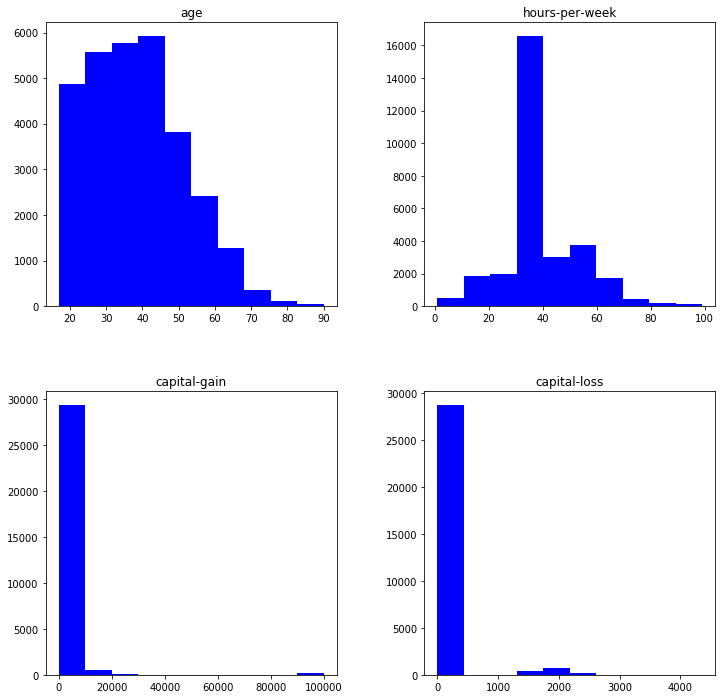

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.68)

# age
p1 = data.hist(column='age', color='blue', grid=False, ax=axs[0][0])
    
#color='#46cf16'
#hours-per-week
p2 = data.hist(column='hours-per-week', color='blue', grid=False, ax=axs[0][1])

    
#capital-gain
p3 = data.hist(column='capital-gain', color='blue', grid=False, ax=axs[1][0])

    
#capital-loss
p4 = data.hist(column='capital-loss', color='blue', grid=False, ax=axs[1][1])

plt.show()

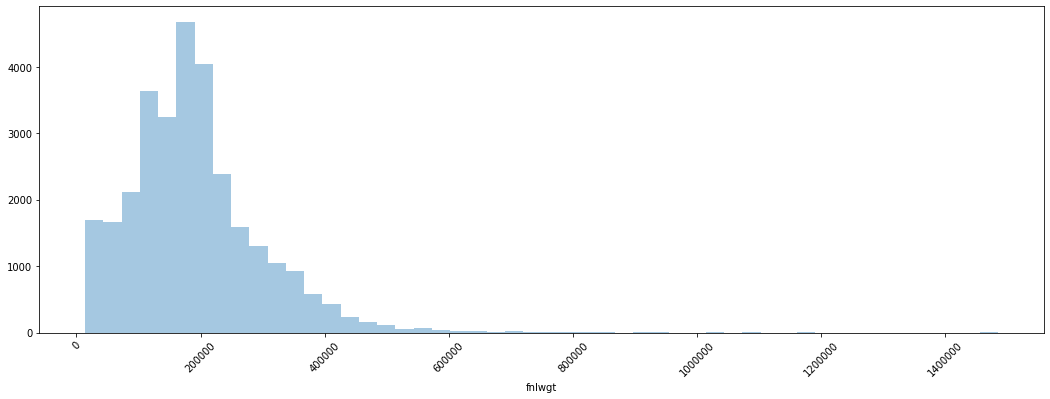

In [25]:
#fnlwgt
fig, ax = plt.subplots(figsize=(18, 6))

p1 = sns.distplot(data['fnlwgt'], kde=False)
for tick in p1.get_xticklabels():
    tick.set_rotation(45)
    
plt.show()

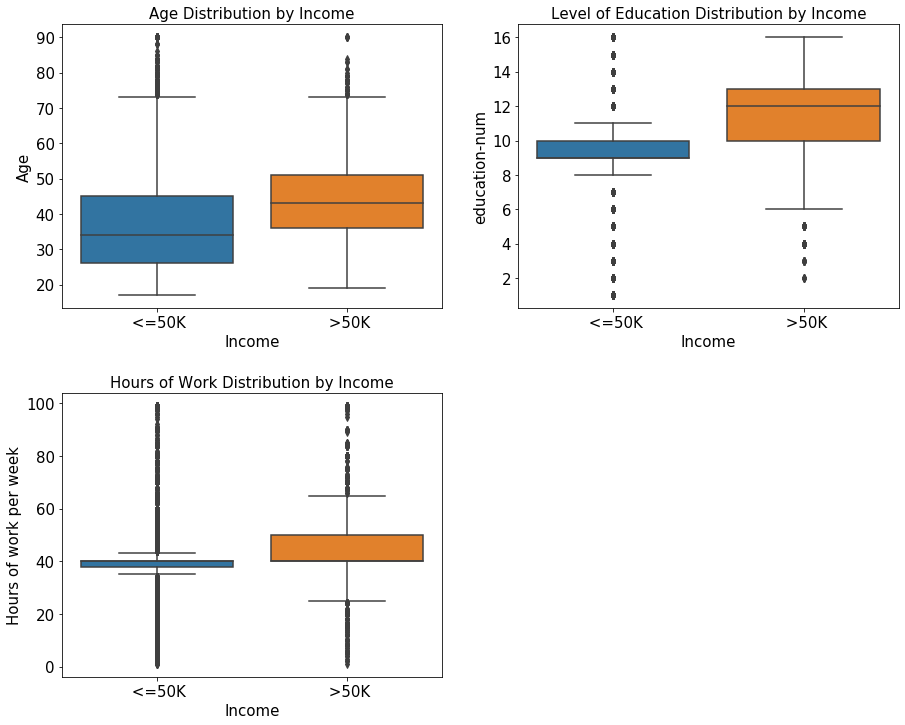

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)
fig.delaxes(axs[1][1])

sns.boxplot(x = 'target', y='age', data = data_copy, orient = 'v', ax=axs[0][0])
axs[0][0].set_xlabel("Income", fontsize=15)
axs[0][0].set_ylabel('Age', fontsize=15)
axs[0][0].set_title('Age Distribution by Income', fontsize=15)
axs[0][0].tick_params(labelsize=15)

sns.boxplot(x = 'target', y='education-num', data = data_copy, orient = 'v', ax=axs[0][1])
axs[0][1].set_xlabel("Income", fontsize=15)
axs[0][1].set_ylabel('education-num', fontsize=15)
axs[0][1].set_title('Level of Education Distribution by Income', fontsize=15)
axs[0][1].tick_params(labelsize=15)

sns.boxplot(x = 'target', y='hours-per-week', data = data_copy, orient = 'v', ax=axs[1][0])
axs[1][0].set_xlabel("Income", fontsize=15)
axs[1][0].set_ylabel('Hours of work per week', fontsize=15)
axs[1][0].set_title('Hours of Work Distribution by Income', fontsize=15)
axs[1][0].tick_params(labelsize=15)

plt.show()

We then made a **pairplot** with Seaborn to examine the correlation between each of the measurements.

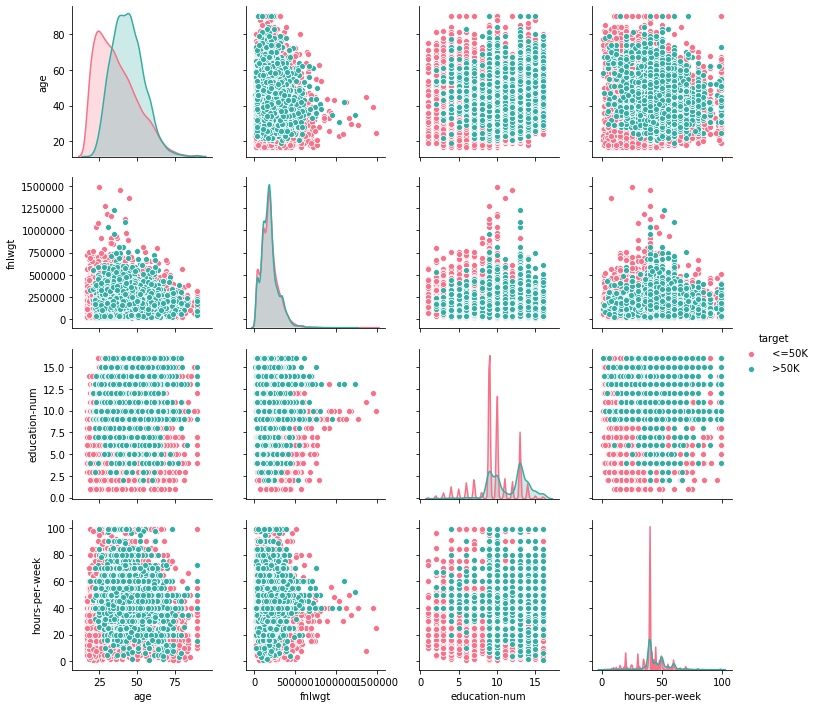

In [27]:
sns.pairplot(data.loc[:,["age","fnlwgt","education-num","hours-per-week","target"]],hue='target', palette='husl') # add jittering, transparency and range values

Going on with data cleaning, we're going to scale numerical variables and convert categorical ones to dummies.

## Standard Scaling for numeric variables

In [28]:
num_cols=data_copy.select_dtypes('number').columns


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
num = data_copy.select_dtypes(include=['int64'])
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)

In [31]:
num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [32]:
num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


## One-hot encoding for dummy variables:

In [33]:
cat = data_copy.select_dtypes(include=['object'])
cat=cat.drop(columns=['education', 'native-country'])
cat_copy=cat.copy()
cat['sex'] = cat['sex'].replace({' Male':0, ' Female':1})
cat['target'] = cat['target'].replace({" <=50K":0, " >50K":1})
one_hot_encode_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
cat = pd.get_dummies(cat, columns=one_hot_encode_cols)

cat

,sex,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
new_train = pd.concat([num_df, cat.reset_index()], axis=1)


In [35]:
new_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,index,sex,target,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734,4,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.870832,0.638972,0.736754,-0.147445,-0.218586,-0.244682,32556,1,0,0,...,0,0,0,0,1,0,0,0,0,1
30158,0.118931,-0.335252,-0.439738,-0.147445,-0.218586,-0.077734,32557,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30159,1.489374,-0.358575,-0.439738,-0.147445,-0.218586,-0.077734,32558,1,0,0,...,0,0,0,1,0,0,0,0,0,1
30160,-1.251511,0.110705,-0.439738,-0.147445,-0.218586,-1.747213,32559,0,0,0,...,0,0,1,0,0,0,0,0,0,1


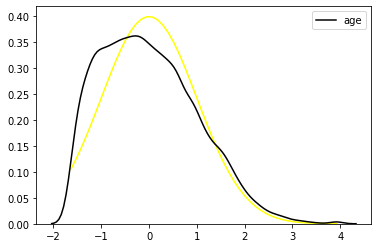

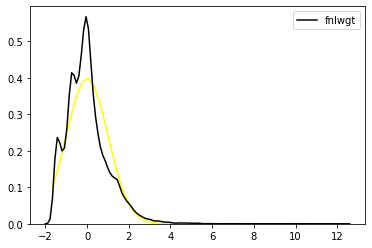

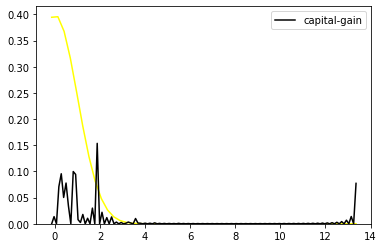

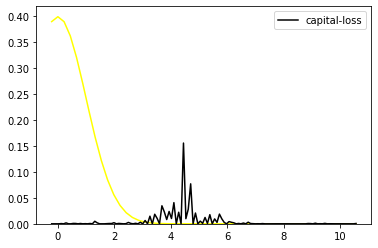

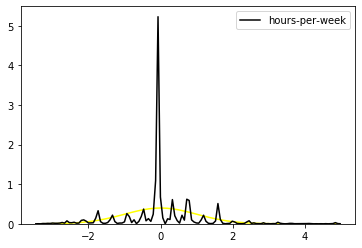

In [36]:
from scipy.stats import norm

for column in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    mean=new_train[column].mean()
    std=new_train[column].std()
    dist = norm(mean, std)
    min_ = new_train[column].min()
    max_ = new_train[column].max()
    xs = np.linspace(min_, max_)
    ys = dist.pdf(xs)
    fig, ax = plt.subplots()
    ax.plot(xs, ys, color='yellow')
    sns.kdeplot(new_train[column],color='black',ax=ax)
    plt.show()


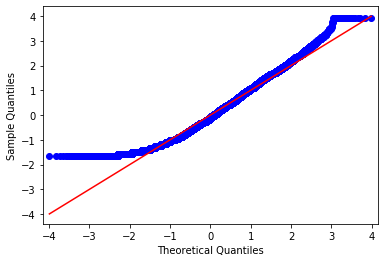

In [37]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(new_train['age'], line='s')
pyplot.show()

In [38]:
data_copy['native-country'].value_counts()/325.61

 United-States                 84.469150
 Mexico                         1.873407
 Philippines                    0.577378
 Germany                        0.393108
 Puerto-Rico                    0.334756
 Canada                         0.328614
 India                          0.307116
 El-Salvador                    0.307116
 Cuba                           0.282547
 England                        0.264120
 Jamaica                        0.245693
 South                          0.218052
 Italy                          0.208839
 China                          0.208839
 Dominican-Republic             0.205768
 Vietnam                        0.196554
 Guatemala                      0.193483
 Japan                          0.181198
 Columbia                       0.171985
 Poland                         0.171985
 Iran                           0.128989
 Taiwan                         0.128989
 Haiti                          0.128989
 Portugal                       0.104419
 Nicaragua      

In [39]:
data_copy['occupation'].value_counts()/325.61

 Prof-specialty       12.401339
 Craft-repair         12.376770
 Exec-managerial      12.260066
 Adm-clerical         11.427782
 Sales                11.007033
 Other-service         9.864562
 Machine-op-inspct     6.037898
 Transport-moving      4.827862
 Handlers-cleaners     4.146064
 Farming-fishing       3.037376
 Tech-support          2.800897
 Protective-serv       1.977826
 Priv-house-serv       0.439176
 Armed-Forces          0.027640
Name: occupation, dtype: float64

In [40]:
data_copy_num=data_copy.copy()

In [41]:
data_copy_num.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


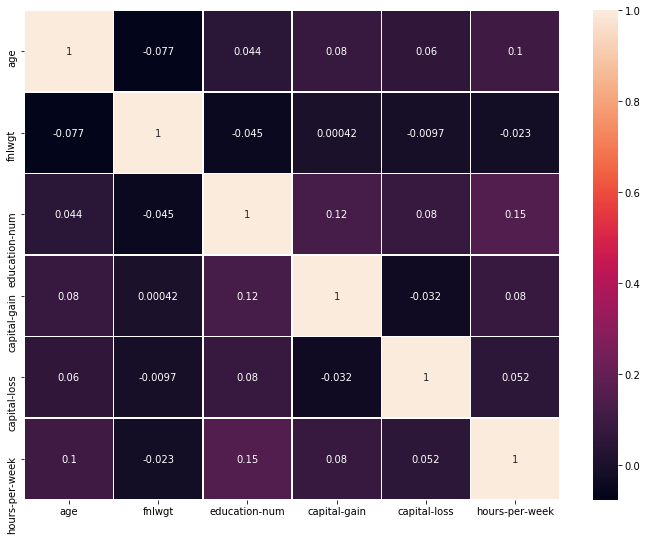

In [42]:
t1=data_copy_num.corr()
plt.figure(figsize=(12,9))
ax = sns.heatmap(t1,linewidths=.5,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

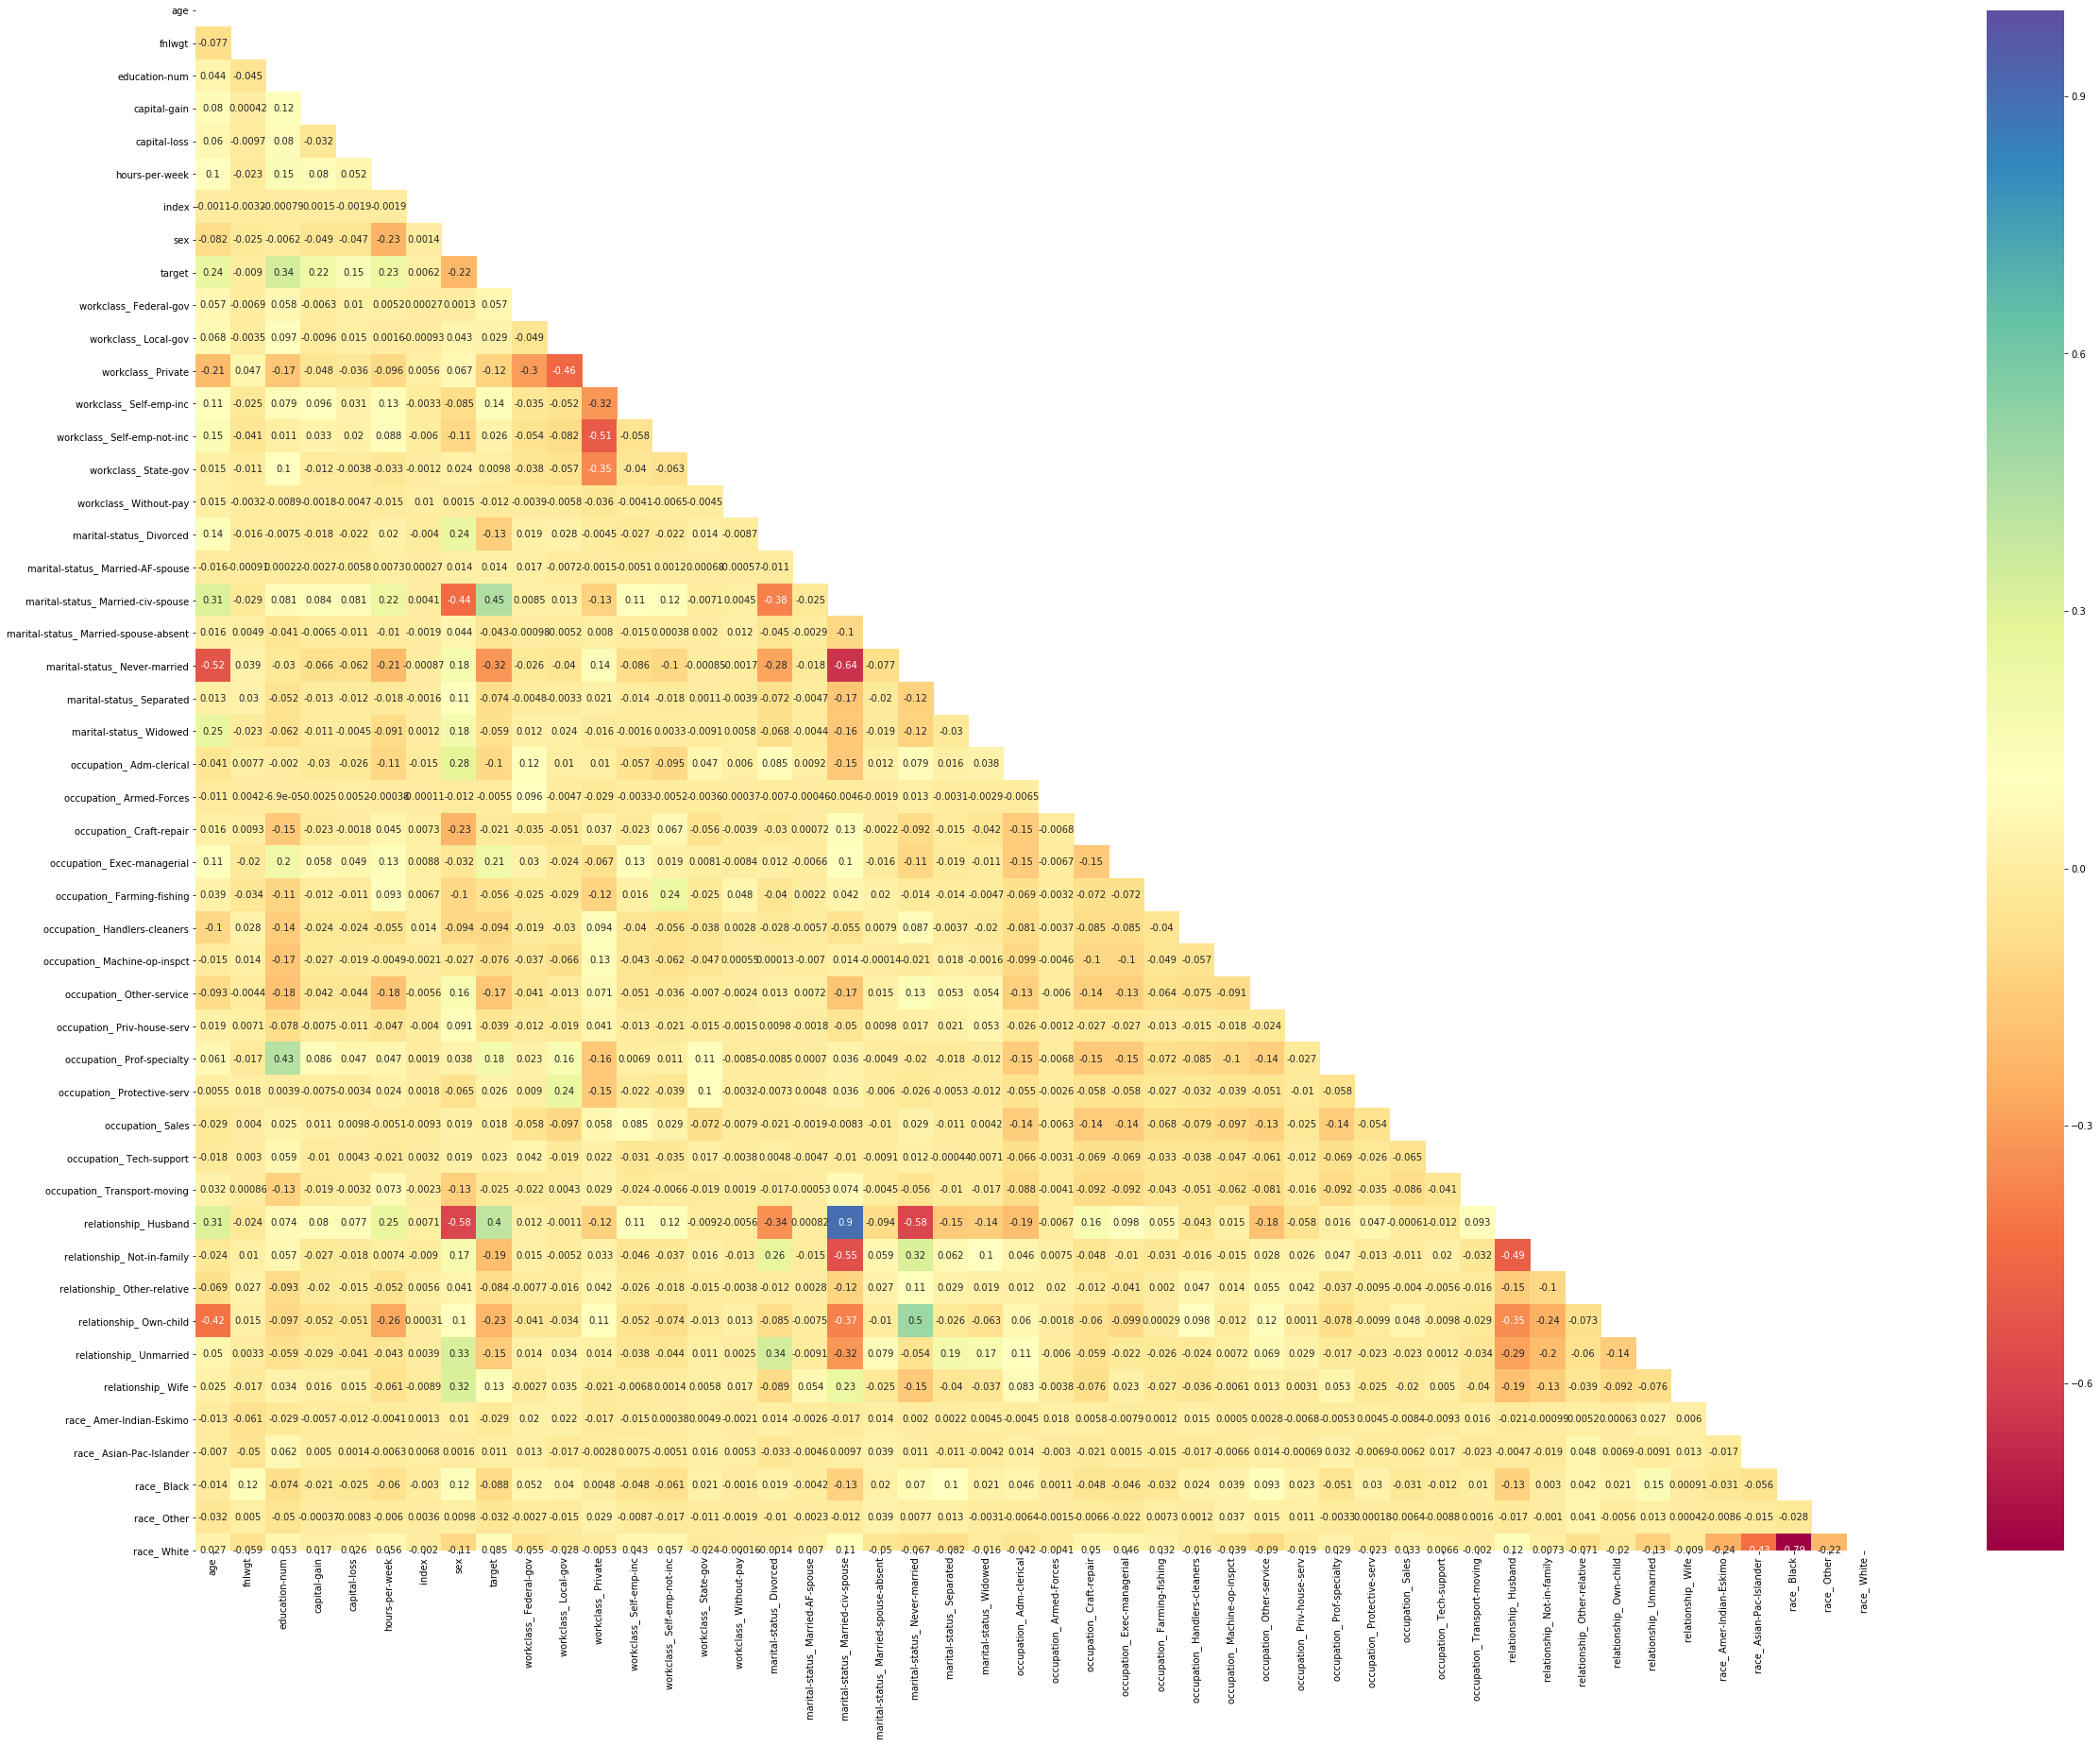

In [43]:
plt.figure(figsize=(40,30))
mask = np.tril(new_train.shape)
sns.heatmap(new_train.corr(),annot=True,cmap="Spectral",mask = np.tril(np.ones(new_train.corr().shape)).T)

# Load the test data 
and perform scaling, encoding etc.

In [44]:
### BEGIN SOLUTION
filepath = 'adult-test.csv'
missing_val = ' ?'
test_data = pd.read_csv(filepath, sep=',', header=None, names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race", "sex","capital-gain", "capital-loss", "hours-per-week", "native-country", "target"], na_values=missing_val)

In [45]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [46]:
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
target              0
dtype: int64

In [47]:
check=test_data.loc[test_data['workclass'].isnull()==True,['workclass','occupation','native.country','target']]
check['target'].value_counts()

 <=50K.    889
 >50K.      74
Name: target, dtype: int64

In [48]:
test_data.dropna(inplace=True)

In [49]:
test_data.shape

(15060, 15)

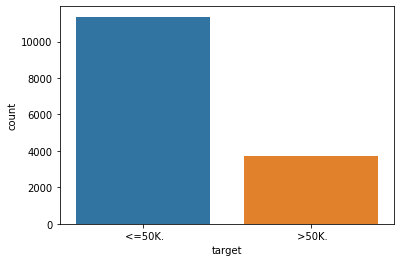

In [50]:
sns.countplot(test_data['target'])
plt.show()

In [51]:
test_data['target'].value_counts()

 <=50K.    11360
 >50K.      3700
Name: target, dtype: int64

In [52]:
test_data['target'].value_counts(normalize=True)

 <=50K.    0.754316
 >50K.     0.245684
Name: target, dtype: float64

In [53]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [54]:
test_num = test_data.select_dtypes(include=['int64'])
scaler = StandardScaler()
test_num_df = pd.DataFrame(scaler.fit_transform(test_num), 
                      columns = test_num.columns)

In [55]:
test_cat = test_data.select_dtypes(include=['object'])
test_cat=test_cat.drop(columns=['education', 'native-country'])
test_cat_copy=test_cat.copy()
test_cat['sex'] = test_cat['sex'].replace({' Male':0, ' Female':1})
test_cat['target'] = test_cat['target'].replace({" <=50K.":0, " >50K.":1})
one_hot_encode_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
test_cat = pd.get_dummies(test_cat, columns=one_hot_encode_cols)
test_cat

,sex,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
16276,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
16278,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16279,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [56]:
new_test = pd.concat([test_num_df, test_cat.reset_index()], axis=1)
new_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,index,sex,target,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,-1.029005,0.352098,-1.216563,-0.145438,-0.219169,-0.078889,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,-0.057423,-0.944995,-0.434898,-0.145438,-0.219169,0.750131,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.804794,1.395062,0.737599,-0.145438,-0.219169,-0.078889,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.391000,-0.277369,-0.044066,0.852624,-0.219169,-0.078889,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.356371,0.085944,-1.607395,-0.145438,-0.219169,-0.907909,5,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,0.526407,1.128431,-0.145438,-0.219169,-0.078889,16275,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15056,0.017315,0.244316,1.128431,-0.145438,-0.219169,-0.410497,16276,1,0,0,...,1,0,0,0,0,0,0,0,0,1
15057,-0.057423,1.755175,1.128431,-0.145438,-0.219169,0.750131,16278,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15058,0.391000,-1.001078,1.128431,0.562734,-0.219169,-0.078889,16279,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [57]:
new_train=new_train.drop(columns=['index'])
new_test=new_test.drop(columns=['index'])

In [58]:
y_train = new_train.pop('target')
X_train = new_train

In [59]:
y_test = new_test.pop('target')
X_test = new_test

# PCA

In [62]:
from sklearn.decomposition import PCA

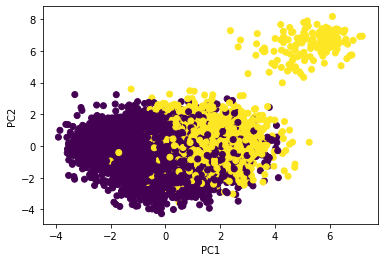

In [98]:
#we performed pca using 10 components; we then represented the db using the first 2 components
pca = PCA(n_components=10)
X_new = pca.fit_transform(X_train)

plt.scatter(X_new[:,0], X_new[:,1], c = y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [111]:
weights=pca.explained_variance_ratio_.reshape(-1,1)/pca.explained_variance_ratio_.sum()
overall_contribution=np.abs(pca.components_)*weights
abs_feature_values=overall_contribution.sum(axis=0)
feature_weight_list=pd.DataFrame({'features':X_train.columns, 'ft. importance':abs_feature_values*100/abs_feature_values.sum()})

In [117]:
for i in range(len(feature_weight_list['ft. importance'])):
    feature_weight_list['ft. importance'][i]=round(feature_weight_list['ft. importance'][i],2)
feature_weight_list.sort_values(by=['ft. importance'], ascending=False)[:10]

,features,ft. importance
0,age,10.84
3,capital-gain,10.27
2,education-num,10.18
5,hours-per-week,9.87
4,capital-loss,9.28
1,fnlwgt,7.89
18,marital-status_ Never-married,4.19
16,marital-status_ Married-civ-spouse,4.16
35,relationship_ Husband,4.14
6,sex,3.53


In [118]:
feature_weight_list['ft. importance'].sort_values(ascending=False)[:10].sum()

74.35

In [121]:
pca.explained_variance_ratio_.reshape(-1,1)

array([[0.16835145],
       [0.11686613],
       [0.11167998],
       [0.10860064],
       [0.0982398 ],
       [0.08900849],
       [0.05986251],
       [0.02535617],
       [0.02435147],
       [0.0200282 ]])

In [122]:
#qui calcoliamo l'importanza delle varie features solo per il contributo dato alle prime due componenti ottenute
#attraverso la PCA, e non il contributo a tutte e 10 le componenti
weights=pca.explained_variance_ratio_[:2].reshape(-1,1)/pca.explained_variance_ratio_[:2].sum()
overall_contribution=np.abs(pca.components_[:2])*weights
abs_feature_values=overall_contribution.sum(axis=0)
feature_weight_list=pd.DataFrame({'features':X_train.columns, 'ft. importance':abs_feature_values*100/abs_feature_values.sum()})

In [124]:
for i in range(len(feature_weight_list['ft. importance'])):
    feature_weight_list['ft. importance'][i]=round(feature_weight_list['ft. importance'][i],2)
feature_weight_list.sort_values(by=['ft. importance'], ascending=False)[:10]

,features,ft. importance
0,age,15.30
2,education-num,13.89
3,capital-gain,10.53
5,hours-per-week,10.09
18,marital-status_ Never-married,5.82
1,fnlwgt,5.58
16,marital-status_ Married-civ-spouse,5.28
35,relationship_ Husband,5.23
4,capital-loss,4.93
38,relationship_ Own-child,3.26


In [125]:
feature_weight_list['ft. importance'].sort_values(ascending=False)[:10].sum()

79.91000000000001

# t-SNE

In [71]:
from matplotlib.colors import ListedColormap


In [72]:
from sklearn.manifold import TSNE


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30162 samples in 0.945s...
[t-SNE] Computed neighbors for 30162 samples in 64.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30162
[t-SNE] Computed conditional probabilities for sample 2000 / 30162
[t-SNE] Computed conditional probabilities for sample 3000 / 30162
[t-SNE] Computed conditional probabilities for sample 4000 / 30162
[t-SNE] Computed conditional probabilities for sample 5000 / 30162
[t-SNE] Computed conditional probabilities for sample 6000 / 30162
[t-SNE] Computed conditional probabilities for sample 7000 / 30162
[t-SNE] Computed conditional probabilities for sample 8000 / 30162
[t-SNE] Computed conditional probabilities for sample 9000 / 30162
[t-SNE] Computed conditional probabilities for sample 10000 / 30162
[t-SNE] Computed conditional probabilities for sample 11000 / 30162
[t-SNE] Computed conditional probabilities for sample 12000 / 30162
[t-SNE] Computed conditional probabilities for sa

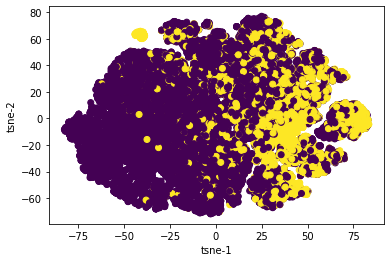

In [75]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_res = tsne.fit_transform(X_train)

plt.scatter(tsne_res[:,0], tsne_res[:,1], c = y_train, cmap='viridis')
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')
plt.show()

# Baseline Model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report

In [84]:
baseline=np.zeros(len(y_test))
print('Confusion matrix :')
print(confusion_matrix(y_test,baseline))
print('\n')

Confusion matrix :
[[11360     0]
 [ 3700     0]]




In [85]:
print(classification_report(y_test,baseline))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



In [86]:
baseline=np.zeros(len(y_test))+1
print('Confusion matrix :')
print(confusion_matrix(y_test,baseline))
print('\n')

Confusion matrix :
[[    0 11360]
 [    0  3700]]




In [87]:
print(classification_report(y_test,baseline))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11360
           1       0.25      1.00      0.39      3700

    accuracy                           0.25     15060
   macro avg       0.12      0.50      0.20     15060
weighted avg       0.06      0.25      0.10     15060



# LOGISTIC REGRESSION

In [167]:
lr = LogisticRegression()
clf=lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
accuracy_value=accuracy_score(y_test, y_predict)


In [89]:
accuracy_value

0.847808764940239

In [90]:
recall_value=recall_score(y_test,y_predict)
recall_value

0.6032432432432432

In [91]:
#X_train=X_train.drop(columns=['index'])

In [92]:
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict))
print('\n')

Confusion matrix :
[[10536   824]
 [ 1468  2232]]




In [168]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_predict),2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_predict),2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_predict),2)))
print('F1 Score : ' + str(round(f1_score(y_test,y_predict),2)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.85
Precision Score : 0.73
Recall Score : 0.6
F1 Score : 0.66


array([[10550,   810],
       [ 1480,  2220]], dtype=int64)

## Hyperparameter Tuning

A machine learning model has multiple parameters that are not trained by the training set. These parameters control the accuracy of the model and are manually configured by us when we call the functions of the model that we are training. So, it is pretty clear that, in order to have a good accuracy, an important step of the analysis is to "tune" the hyperparameters, checking which values of these hyperparameters guarantees a better performance. This phase is called **hyperparameter tuning**.

For this phase we used the **`GridSearchCV`** function, a function from the _sklearn_ library, that works in this way:

* it takes as input: model function (es. _LogisticRegression()_), parameters to tune (with the values they can take), scoring measure, cv preferences, number of processors to use;
* it starts fitting exhaustively every possible model (one for every combination of parameters' values) and uses CV to predict the accuracy (or whatever measure is given) of that model;
* it stores the best model as an attribute named `.best_estimator_`

In the following example we can see that we try 2 possible values for _'penalty'_ and 101 for _'C'_ , and every model is performed 5 times, because we are using __5-fold Cross Validation__ to predict the accuracy of every model. Therefore, `GridSearchCV` is going to do $2*101*5=1010$ fits for logistic regression on this training data.

In [160]:
#Hyperparameter tuning of Logistic Regression
from sklearn.model_selection import GridSearchCV


C = np.linspace(0.001, 10, num=100)
C=np.append(C,1)

param_grid = {'penalty':['l1', 'l2'], 'C':C}

grid = GridSearchCV(LogisticRegression(max_iter=250), param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)



Fitting 5 folds for each of 202 candidates, totalling 1010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 882 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1010 out of 1010 | elapsed:  3.2min finished


GridSearchCV(estimator=LogisticRegression(max_iter=250), n_jobs=-1,
             param_grid={'C': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01, 1.000e+00]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [161]:
grid.best_params_


{'C': 0.10200000000000001, 'penalty': 'l2'}

In [162]:
grid.best_score_


0.8477888413021045

In [170]:
lr=LogisticRegression(C=0.102000000000000001, penalty='l2')
lr=lr.fit(X_train,y_train)

In [171]:
#Predict values based on new parameters
y_pred_acc = lr.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_acc),2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_acc),2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_acc),2)))
print('F1 Score : ' + str(round(f1_score(y_test,y_pred_acc),2)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.85
Precision Score : 0.73
Recall Score : 0.6
F1 Score : 0.66


array([[10550,   810],
       [ 1480,  2220]], dtype=int64)

in this case we have basically the same performance even after hyperparameter tuning (our first guess for hyperparameters was a lucky one). In the next algorithm we can see that GridSearchCV really improved our performance!

# Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [207]:
#Applying the Decision Tree algorithm
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#y_pred = decision_tree.predict(X_test)
#print(classification_report(y_test,y_pred))


DecisionTreeClassifier()

In [208]:
decision_tree.tree_.node_count, decision_tree.tree_.max_depth

(8961, 51)

In [64]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':round(accuracy_score(y_true, y_pred),2),
                      'precision': round(precision_score(y_true, y_pred),2),
                      'recall': round(recall_score(y_true, y_pred),2),
                      'f1': round(f1_score(y_true, y_pred),2)},
                      name=label)



In [211]:
# The error on the training and test data sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

train_test_full_error = pd.concat([full_measure_error(y_train, y_train_pred, 'train'),
                              full_measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error


,train,test
accuracy,0.999967,0.798008
precision,1.000000,0.585233
recall,0.999867,0.610541
f1,0.999933,0.597619


we use **`GridSearchCV`** to tune the maximum depth of the tree and the maximum numbers of features that can be used for each split. Here we can see that we have a massive number of fits to try!

In [212]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, decision_tree.tree_.max_depth+1, 2),
              'max_features': range(1, len(decision_tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  verbose=1,
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

Fitting 5 folds for each of 1196 candidates, totalling 5980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1514 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 2414 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3514 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4601 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5351 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5980 out of 5980 | elapsed:  3.6min finished


(377, 9)

In [213]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [216]:
GR.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=41, random_state=42)

In [217]:
confmat=confusion_matrix(y_test,y_test_pred_gr)
confmat

array([[10733,   627],
       [ 1579,  2121]], dtype=int64)

In [215]:
train_test_gr_error


,train,test
accuracy,0.86,0.85
precision,0.80,0.77
recall,0.60,0.57
f1,0.69,0.66


In [62]:
from sklearn.tree import plot_tree

In [63]:
dtgs=DecisionTreeClassifier(max_depth=9, max_features=41, random_state=42)
dtgs.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features=41, random_state=42)

In [64]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

We graphically visualize the beginning of our tree through the help of our functions sklearn.plot_tree and export_graphviz

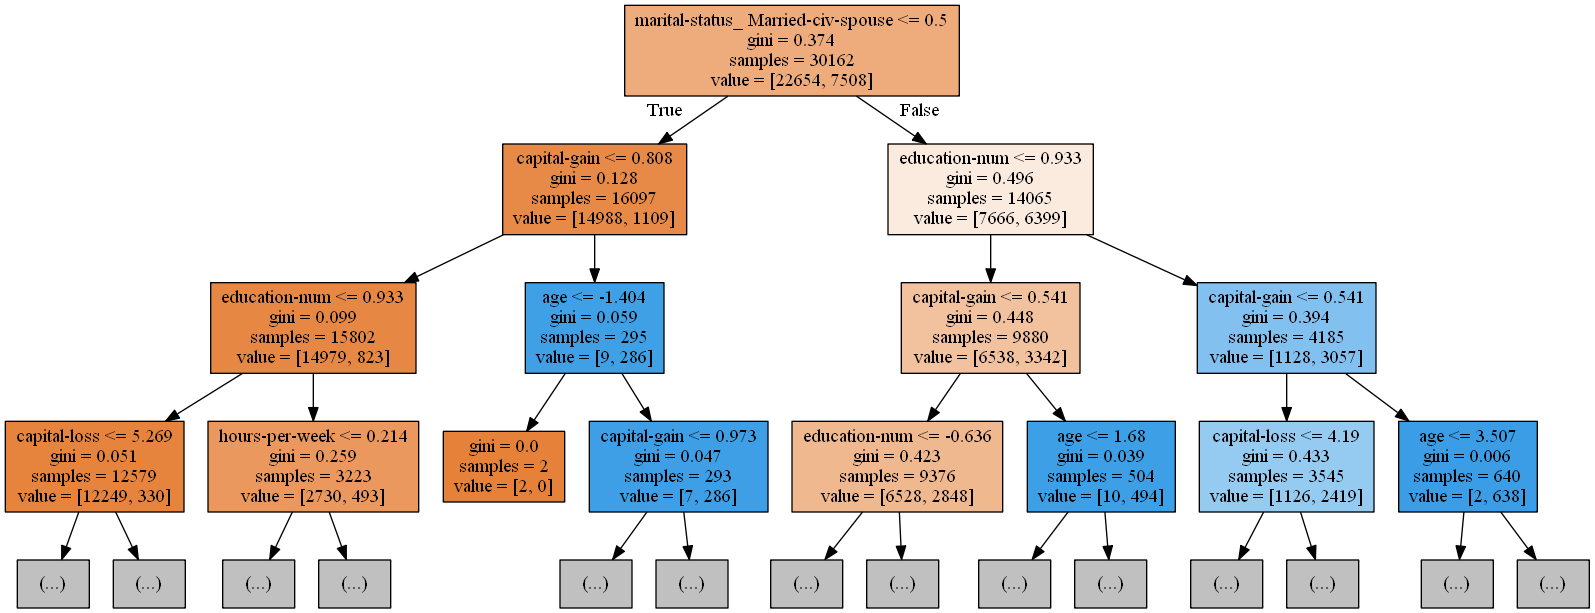

In [92]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dtgs, out_file=dot_data, filled=True,max_depth=3,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# View the tree image
filename = 'decision_tree.png'
graph.write_png(filename)
Image(filename=filename) 

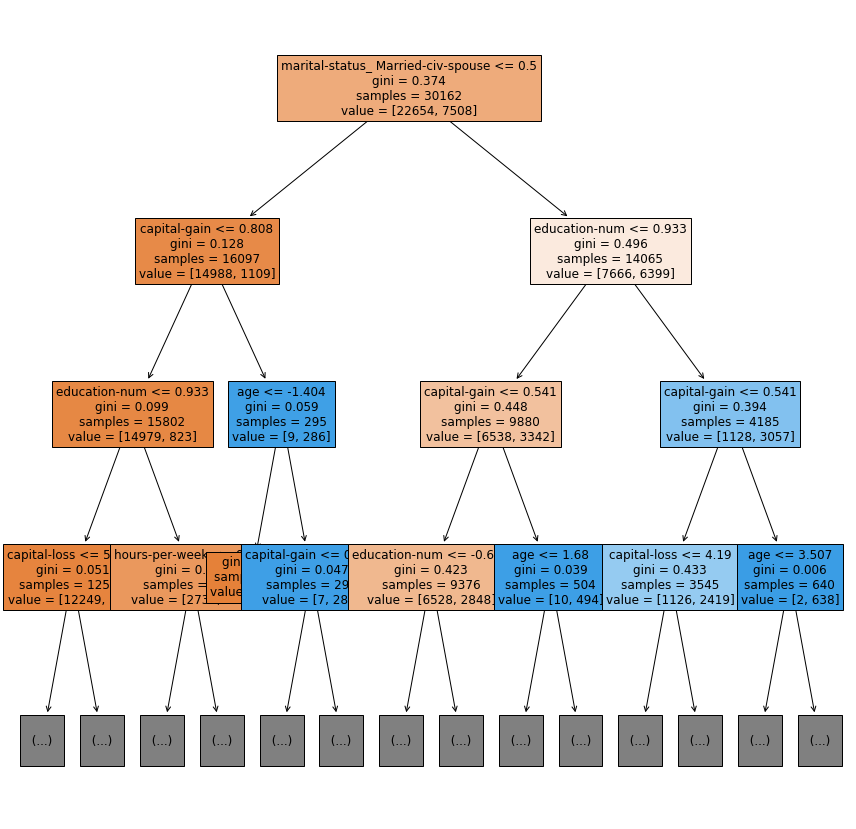

In [109]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(15,15))
plot_tree(dtgs, max_depth=3, feature_names=X_train.columns, fontsize=12, filled=True)
plt.show() 

# K-Nearest Neighbors

In [154]:
from sklearn.neighbors import KNeighborsClassifier

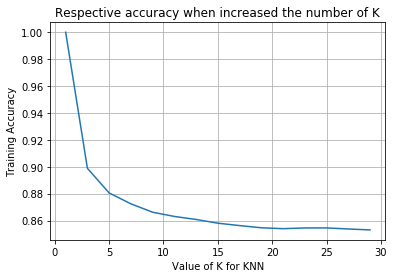

In [165]:
#Analysing the accuracy by increasing the number of K
scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    scores.append(accuracy_score(y_train, y_train_pred))

sns.lineplot(range(1,30,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Training Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()

In [152]:
k_range=range(1,20,2)

In [155]:
grid_params={'n_neighbors':k_range, 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}

gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=5,n_jobs=-1)

gs_results=gs.fit(X_train, y_train)

gs.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 11.4min finished


{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

In [173]:
y_train_pred = gs.predict(X_train)
y_pred=gs.predict(X_test)

In [177]:
train_test_knn_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                 measure_error(y_test, y_pred, 'test')],
                                axis=1)

In [178]:
train_test_knn_error

,train,test
accuracy,0.85,0.84
precision,0.74,0.71
recall,0.64,0.62
f1,0.69,0.66


# Support Vector Classifier

In [1]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(-3, 3, .005), np.arange(-3, 3, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.5)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

In [185]:
new_train=new_train.drop(columns=['pca-one', 'pca-two', 'pca-three'])

In [68]:

fields = list(new_train)  
correlations = new_train[fields].corrwith(y_train)
correlations.sort_values(inplace=True)
#from sklearn.preprocessing import MinMaxScaler
correlations.map(abs).sort_values()
fields = correlations.map(abs).sort_values().iloc[-6:-4].index
#fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = new_train[fields]
print(X.columns)

Index(['hours-per-week', 'age'], dtype='object')
Index(['hours-per-week', 'age'], dtype='object')


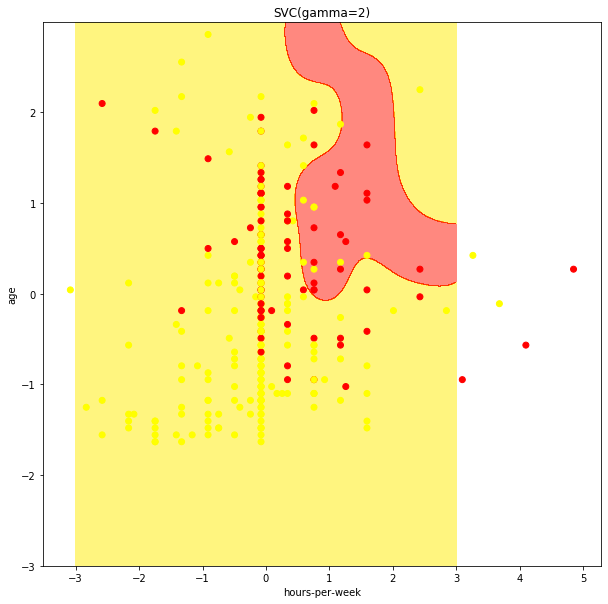

In [195]:
from sklearn.svm import SVC

SVC_Gaussian = SVC(kernel='rbf', gamma=2)
plot_decision_boundary(SVC_Gaussian, X, y_train)

In [196]:
SVC=SVC_Gaussian.fit(X_train, y_train)
y_train_pred = SVC.predict(X_train)
y_pred=SVC.predict(X_test)
train_test_svc_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_svc_error
                              

,train,test
accuracy,0.94,0.80
precision,0.92,0.70
recall,0.82,0.35
f1,0.87,0.47


In [ ]:
confmat=confusion_matrix(y_test,y_pred)
confmat

In [60]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem

In [61]:
def full_measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)


In [66]:
lsvc = LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=300)
data_transformed = feature_map_nystroem.fit_transform(X_train)
lsvc.fit(X_train, y_train)

y_train_pred = lsvc.predict(X_train)
y_pred=lsvc.predict(X_test)
train_test_svc_error = pd.concat([full_measure_error(y_train, y_train_pred, 'train'),full_measure_error(y_test, y_pred, 'test')],axis=1)
train_test_svc_error

,train,test
accuracy,0.848319,0.848805
precision,0.740686,0.737088
recall,0.601092,0.597838
f1,0.663628,0.660200


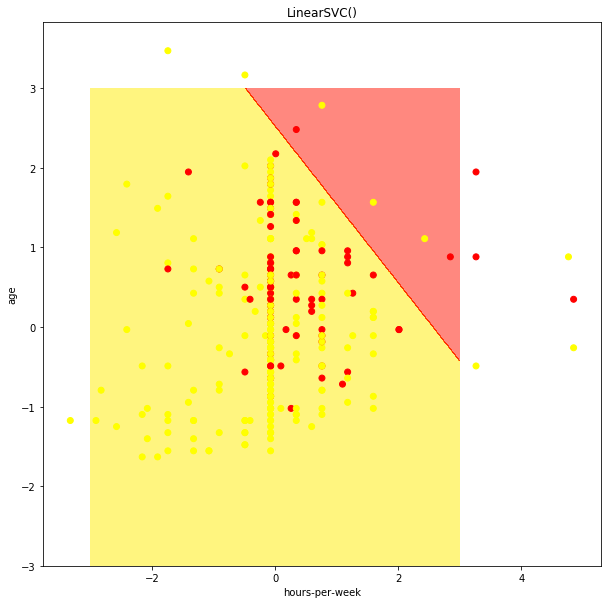

In [69]:
plot_decision_boundary(lsvc, X, y_train)

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier


In [146]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=1, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  9.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [147]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500}

In [148]:
y_pred=CV_rfc.predict(X_test)
y_train_pred=CV_rfc.predict(X_train)
train_test_svc_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_svc_error

,train,test
accuracy,0.865327,0.855312
precision,0.829572,0.797186
recall,0.577651,0.551351
f1,0.681062,0.651861


In [149]:
confmat=confusion_matrix(y_test,y_pred)
confmat

array([[10841,   519],
       [ 1660,  2040]], dtype=int64)

## Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [145]:
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)
y_train_pred=gbm_model.predict(X_train)
train_test_gbm_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_gbm_error

,train,test
accuracy,0.864730,0.859960
precision,0.794907,0.779613
recall,0.615344,0.599459
f1,0.693694,0.677769


In [146]:
xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
train_test_xgb_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_xgb_error

,train,test
accuracy,0.901101,0.855976
precision,0.848023,0.749105
recall,0.734283,0.622162
f1,0.787065,0.679758


In [170]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st


one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0.01, 50)

params = { 
    "base_score":st.gamma(0.001,0.8),
    "n_estimators": st.randint(3, 400),
    "max_depth": st.randint(0.1,40),
    "learning_rate": st.uniform(0.0005, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 100),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}



class_mod = XGBClassifier(objective='binary:logistic',feature_selector='random')

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(class_mod, params, verbose=1, scoring='accuracy', n_jobs=-1)  
gs.fit(X_train, y_train)  
gs.best_score_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


[02:47:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { feature_selector } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.8586967083340478

In [147]:
from lightgbm import LGBMClassifier,plot_importance
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)

In [148]:
y_pred=lgbm_model.predict(X_test)
y_train_pred=lgbm_model.predict(X_train)
train_test_svc_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_svc_error

,train,test
accuracy,0.884192,0.861753
precision,0.812160,0.759794
recall,0.695658,0.639459
f1,0.749408,0.694453


# Gradient Boosting Classifier Tuning

In [107]:
from sklearn import metrics

In [108]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [125]:
def modelfit(alg, X_train, y_train, X_test, y_test, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    train_predictions = alg.predict(X_train)
    train_predprob = alg.predict_proba(X_train)[:,1]
    test_predictions = alg.predict(X_test)
    test_predprob = alg.predict_proba(X_test)[:,1]
    
    #Print model report:
    print("\nModel Report")
    print("Train Accuracy : %.4g" % metrics.accuracy_score(y_train.values, train_predictions)) #togliere values? 
    print("Test Accuracy : %.4g" % metrics.accuracy_score(y_test.values, test_predictions)) #togliere values? 

      
    #Print Feature Importance:
    if printFeatureImportance:
        predictors = [x for x in X_train.columns if x not in ['target']]
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        


Model Report
Train Accuracy : 0.8651
Test Accuracy : 0.8596


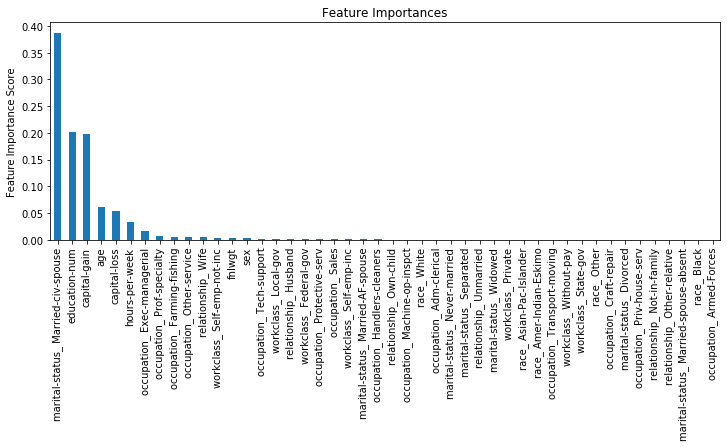

In [185]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, y_train, X_test, y_test)

In [114]:
#Choose all predictors except target & IDcols
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=150,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=-1,verbose=1, cv=5)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.7s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=150,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': range(20, 101, 10)},
             scoring='accuracy', verbose=1)

In [115]:
gsearch1.best_params_, gsearch1.best_score_


({'n_estimators': 100}, 0.8648302154243614)

In [116]:
#try with a higher learning rate 

param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, min_samples_split=150,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=-1,verbose=1, cv=5)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.5s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=150,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': range(20, 101, 10)},
             scoring='accuracy', verbose=1)

In [117]:
gsearch1.best_params_, gsearch1.best_score_


({'n_estimators': 90}, 0.8665874274162311)

In [118]:
param_test1 = {'n_estimators':range(20,101,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=150,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=-1,verbose=1, cv=5)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.2s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=150,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': range(20, 101, 10)},
             scoring='accuracy', verbose=1)

In [119]:
gsearch1.best_params_, gsearch1.best_score_


({'n_estimators': 80}, 0.8668194184856851)

In [120]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=-1,verbose=1, cv=5)
gsearch2.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='accuracy', verbose=1)

In [121]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 1000}, 0.8682782549646264)

In [122]:
#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=9,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='accuracy',n_jobs=6,verbose=1, cv=5)
gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:  1.0min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=9,
                                                  max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=6,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='accuracy', verbose=1)

In [123]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40, 'min_samples_split': 1400}, 0.8678140969583295)

In [127]:
gs3=GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=9,
                               max_features='sqrt', subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs3.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_features='sqrt',
                           min_samples_leaf=40, min_samples_split=1400,
                           n_estimators=80, random_state=10, subsample=0.8)


Model Report
Train Accuracy : 0.8755
Test Accuracy : 0.8584


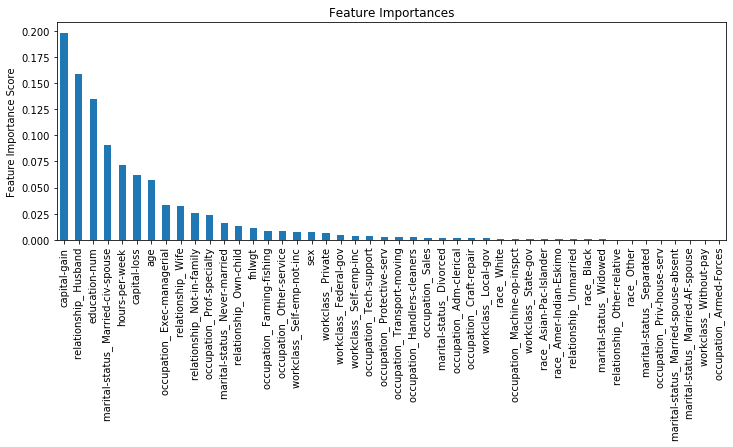

In [129]:
modelfit(gs3, X_train, y_train, X_test, y_test)

In [132]:
#Grid seach on subsample and max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=9, 
                            min_samples_split=1400, min_samples_leaf=40, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='accuracy',n_jobs=6,verbose=1, cv=5)
gs4=gsearch4.fit(X_train,y_train)
gs4.best_params_, gs4.best_score_


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:   22.4s finished


({'max_features': 11}, 0.8679466130359066)

In [133]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=9, 
                            min_samples_split=1400, min_samples_leaf=40, random_state=10, max_features=11),
                       param_grid = param_test5, scoring='accuracy',n_jobs=6,verbose=1, cv=5)
gs5=gsearch5.fit(X_train,y_train)
gs5.best_params_, gs5.best_score_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:   15.8s finished


({'subsample': 0.8}, 0.8679466130359066)


Model Report
Train Accuracy : 0.8792
Test Accuracy : 0.856


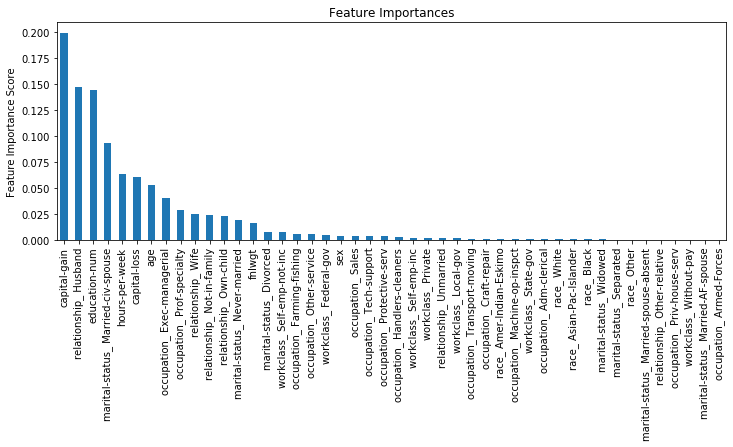

In [136]:
gs5=GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=9,
                               max_features=11, subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs5.fit(X_train,y_train)
modelfit(gs5, X_train, y_train, X_test, y_test)


Model Report
Train Accuracy : 0.8794
Test Accuracy : 0.8589


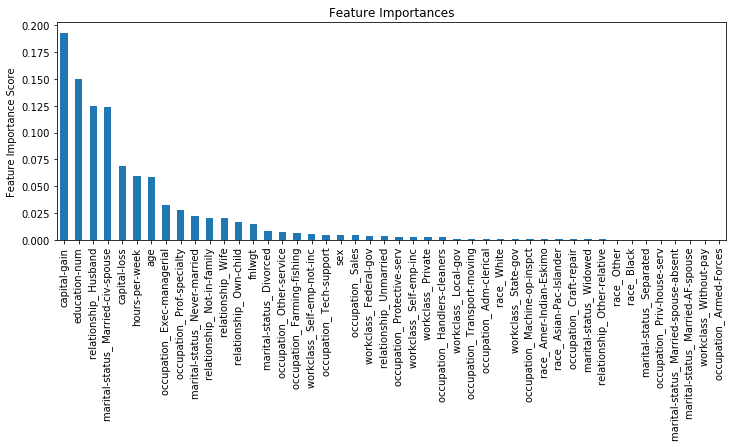

In [137]:
gs6=GradientBoostingClassifier(learning_rate=0.15, n_estimators=110,max_depth=9,
                               max_features=11, subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs6.fit(X_train,y_train)
modelfit(gs6, X_train, y_train, X_test, y_test)


Model Report
Train Accuracy : 0.8798
Test Accuracy : 0.8584


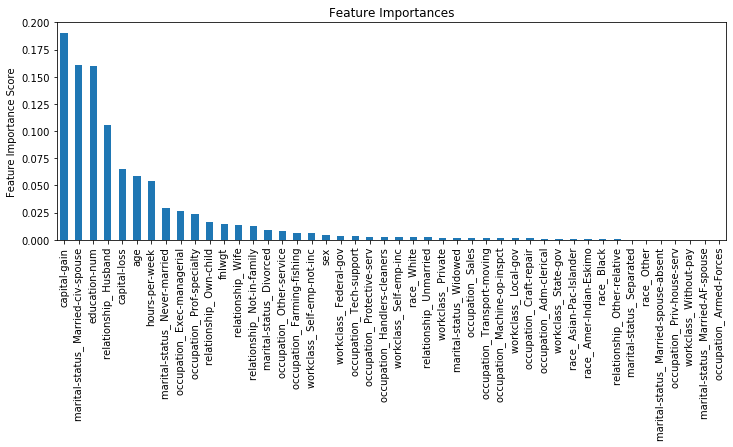

In [142]:
gs7=GradientBoostingClassifier(learning_rate=0.10, n_estimators=160,max_depth=9,
                               max_features=11, subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs7.fit(X_train,y_train)
modelfit(gs7, X_train, y_train, X_test, y_test)


Model Report
Train Accuracy : 0.8796
Test Accuracy : 0.8588


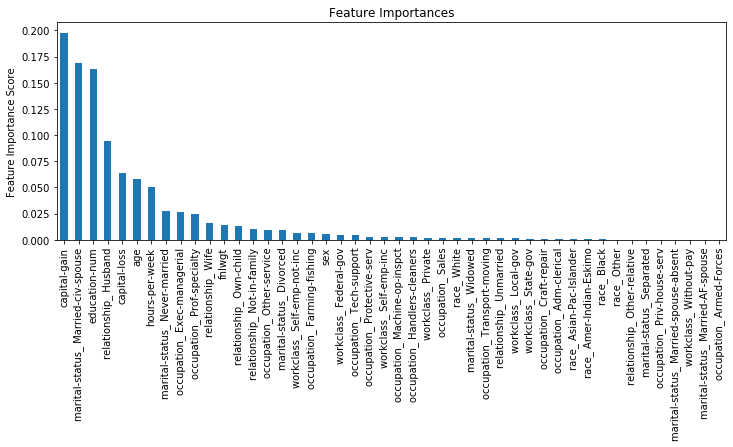

In [143]:
gs8=GradientBoostingClassifier(learning_rate=0.05, n_estimators=320,max_depth=9,
                               max_features=11, subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs8.fit(X_train,y_train)
modelfit(gs8, X_train, y_train, X_test, y_test)


Model Report
Train Accuracy : 0.8794
Test Accuracy : 0.8582


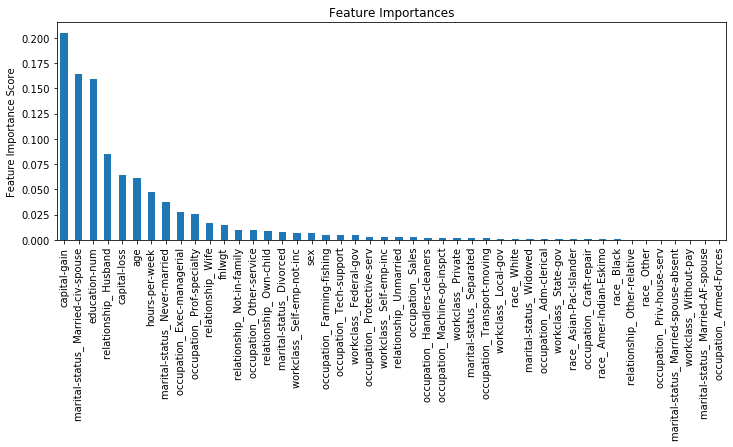

In [146]:
gs9=GradientBoostingClassifier(learning_rate=0.025, n_estimators=640,max_depth=9,
                               max_features=11, subsample=0.8, min_samples_split=1400, min_samples_leaf=40,
                               random_state=10)
gs9.fit(X_train,y_train)
modelfit(gs9, X_train, y_train, X_test, y_test)

In [147]:
y_pred=gs8.predict(X_test)
y_train_pred=gs8.predict(X_train)
train_test_gs8_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),measure_error(y_test, y_pred, 'test')],axis=1)
train_test_gs8_error

,train,test
accuracy,0.879584,0.858765
precision,0.800372,0.751358
recall,0.687800,0.635405
f1,0.739828,0.688534


# Unbalanced Dataset Techniques

In [ ]:
#pip install -U imbalanced-learn

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
from imblearn.under_sampling import RandomUnderSampler

In [151]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline


In [152]:
over = SMOTE()
# transform the dataset
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
X_test_over, y_test_over = over.fit_resample(X_test, y_test)

In [154]:
# summarize the new class distribution
from collections import Counter
counter = Counter(y_train_over)
print(counter)


Counter({0: 22654, 1: 22654})


## refit RandomForest

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=1, n_jobs=-1)
CV_rfc.fit(X_train_over, y_train_over)
CV_rfc.best_params_

In [ ]:
y_pred=CV_rfc.predict(X_test_over)
y_train_pred=CV_rfc.predict(X_train_over)
train_test_svc_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_svc_error

In [ ]:
confmat=confusion_matrix(y_test_over,y_pred)
confmat

## refit Logistic Regression

In [ ]:
#Hyperparameter tuning of Logistic Regression
C = np.linspace(0.001, 10, num=100)

param_grid = {'penalty':['l1', 'l2'], 'C':C}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)

grid.fit(X_train_over, y_train_over)
grid.best_params_


In [ ]:
y_pred=grid.predict(X_test_over)
y_train_pred=grid.predict(X_train_over)
train_test_lr_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_lr_error

In [ ]:
confmat=confusion_matrix(y_test_over,y_pred)
confmat

## Refit decision tree classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over, y_train_over)

In [ ]:


param_grid = {'max_depth':range(1, decision_tree.tree_.max_depth+1, 2),
              'max_features': range(1, len(decision_tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  verbose=1,
                  n_jobs=-1)

GR = GR.fit(X_train_over, y_train_over)

GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

In [ ]:
y_pred=GR.predict(X_test_over)
y_train_pred=GR.predict(X_train_over)
train_test_tree_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_tree_error

## Refit KNN

In [ ]:
k_range=range(5,16,2)
grid_params={'n_neighbors':k_range, 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}

gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=5,n_jobs=-1)

gs_results=gs.fit(X_train_over, y_train_over)

gs.best_params_

In [ ]:
y_pred=gs.predict(X_test_over)
y_train_pred=gs.predict(X_train_over)
train_test_tree_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_tree_error

### knn con i parametri suggeriti prima di SMOTE

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean', weights='uniform', n_jobs=-1)
knn_old_param=knn.fit(X_train_over,y_train_over)

In [ ]:
y_pred=knn_old_param.predict(X_test_over)
y_train_pred=knn_old_param.predict(X_train_over)
train_test_tree_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_tree_error

## Refit SVC

In [160]:
from sklearn.svm import SVC

SVC_Gaussian = SVC(kernel='rbf', gamma=1)
SVC=SVC_Gaussian.fit(X_train_over, y_train_over)
y_train_pred = SVC.predict(X_train_over)
y_pred=SVC.predict(X_test_over)
train_test_svc_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_svc_error

,train,test
accuracy,0.927408,0.799208
precision,0.896353,0.831998
recall,0.966584,0.749824
f1,0.930145,0.788777


## Refit Gradient Boosting, XGB, LightBoost

In [157]:
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train_over,y_train_over)
y_pred=gbm_model.predict(X_test_over)
y_train_pred=gbm_model.predict(X_train_over)
train_test_gbm_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_gbm_error

,train,test
accuracy,0.861923,0.786180
precision,0.843141,0.710421
recall,0.889291,0.966197
f1,0.865601,0.818799


In [158]:
xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train_over,y_train_over)
y_pred=xgb_model.predict(X_test_over)
y_train_pred=xgb_model.predict(X_train_over)
train_test_xgb_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_xgb_error

,train,test
accuracy,0.926216,0.662940
precision,0.926160,0.597864
recall,0.926282,0.995423
f1,0.926221,0.747044


In [159]:
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train_over,y_train_over)
y_pred=lgbm_model.predict(X_test_over)
y_train_pred=lgbm_model.predict(X_train_over)
train_test_lgbm_error = pd.concat([measure_error(y_train_over, y_train_pred, 'train'),measure_error(y_test_over, y_pred, 'test')],axis=1)
train_test_lgbm_error

,train,test
accuracy,0.904785,0.727597
precision,0.899390,0.649373
recall,0.911539,0.989437
f1,0.905424,0.784122


## PCA + LOGISTIC REGRESSION

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_new = pca.fit_transform(X_train)



In [135]:
X_test_new = pca.fit_transform(X_test)


DA COMPLETARE!!

In [136]:
lr = LogisticRegression(max_iter=250)
clf=lr.fit(X_new,y_train)
y_predict = lr.predict(X_test_new)

In [137]:
y_tr_pred=lr.predict(X_new)


train_test_full_error = pd.concat([measure_error(y_train, y_tr_pred, 'train'),
                              measure_error(y_test, y_predict, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.841091,0.819323
precision,0.729812,0.666667
recall,0.574188,0.529189
f1,0.642713,0.590026


In [143]:
#Hyperparameter tuning of Logistic Regression
from sklearn.model_selection import GridSearchCV


C = np.linspace(0.001, 10, num=100)

param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':C}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='f1', verbose=1, n_jobs=-1)

grid.fit(X_new, y_train)
grid.best_params_


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   12.2s finished


{'C': 1.1119999999999999, 'penalty': 'l2'}

In [144]:
#Predict values based on new parameters
y_predict = grid.predict(X_test_new)


y_tr_pred=grid.predict(X_new)


train_test_full_error = pd.concat([measure_error(y_train, y_tr_pred, 'train'),
                              measure_error(y_test, y_predict, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.841125,0.819323
precision,0.729936,0.666667
recall,0.574188,0.529189
f1,0.642761,0.590026


In [151]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=9, max_features=41, random_state=42)
lr.fit(X_new,y_train)
y_predict = lr.predict(X_test_new)
y_tr_pred=lr.predict(X_new)
train_test_full_error = pd.concat([measure_error(y_train, y_tr_pred, 'train'),
                              measure_error(y_test, y_predict, 'test')],
                              axis=1)
train_test_full_error

,train,test
accuracy,0.841091,0.819323
precision,0.729812,0.666667
recall,0.574188,0.529189
f1,0.642713,0.590026


# Conclusions

## Recap of the analysis

The goal of this analysis was to correctly classify if people earned more or less than 50K dollars/year, based on factors such as their age, their marital status and so on. What we did in order to achieve this goal was:

* **First glance at the dataset**: shape of the dataset, number of features and their nature, missing data;
* **Data Cleaning**: take care of missing data, scaling of numerical features;
* **Feature Engineering**: encoding of categorical and binary variables, dropping redundant data;
* **Data Exploration**: check the proportions of every response class of categorical features, both alone and compared to the target variable; check of the distribution of numerical features and check if the distribution was normal; check class imbalance, check correlation among the features, choice of error metrics; PCA for data visualization and first hint for features' importance;
* **Model Fitting**: creation of a baseline model as a benchmark for error metrics, fitting of Logistic Regression, Decision Tree Classifier, KNN, Gradient Boosting, Random Forest, Support Vector Classifier and hyperparameter tuning for each of the methods; representation of decision trees and svc decision boundary;
* **Oversampling method** + refit of all methods to check for improvement in the models' performance;
* **Fit of some methods** (LR, Decision Trees) **on the first 15 components resulting from PCA** (for dimensionality reduction)

## Model Choice